# Data analysis of the imdb database

The dataset can be obtained from https://www.kaggle.com/karrrimba/movie-metadatacsv

We will use the pandas library for Python. Some tutorials can be found at https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Reading csv data
data = pd.read_csv("./Data/movie_metadata.csv")

In [5]:
data #.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [6]:
# Rapid description of the data
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [7]:
# Dropping data lines with NaN
data.dropna(how='any',inplace=True)
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


## Plotting data

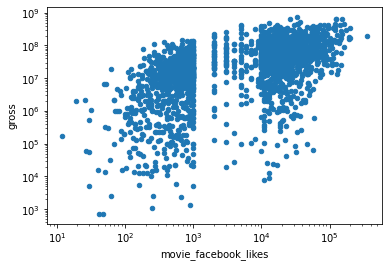

In [8]:
data_sample = data[data.movie_facebook_likes > 0]
data_sample.plot.scatter("movie_facebook_likes","gross", logx=True, logy=True)
plt.show()

### Question 1
Plot different variables and see whether you can spot some correlations. 

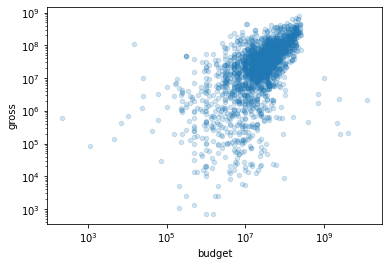

In [9]:
data_sample = data[data.movie_facebook_likes > 0]
data_sample.plot.scatter("budget","gross", logx=True, logy=True, alpha=0.2)
plt.show()

## Gradient descent algorithm

We want to find a linear regression between x = log(budget) and y = log(gross).

The linear regression consists in the hypothesis

$h_\theta (x) = \theta_0 + \theta_1 x$

with the cost function

$J(\theta_0, \theta_1) = \frac{1}{2N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)^2$

The iterative procedure of the gradient descent algorithm is then 

$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)$

with $\alpha$ the learning parameter and 

$\frac{\partial J}{\partial \theta_0} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)$

$\frac{\partial J}{\partial \theta_1} = \frac{1}{N}
\sum_{i=1}^N \left( h_\theta (x^{(i)}) - y^{(i)} \right)x^{(i)}$

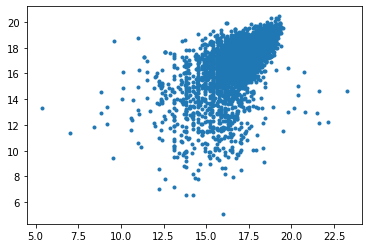

[19.2835707  19.51929303 19.31676877 19.33697148 19.39032265 19.36847014
 19.37619219 19.33697148 19.33697148 19.33697148]


In [10]:
x = np.log(np.array(data["budget"]))
y = np.log(np.array(data["gross"]))
plt.plot(x,y,'.')
plt.show()
print(x[:10])

### Question 2
- Complete the following code to implement a gradient descent algorithm
- Check how the convergence varies with $\alpha$ (a plot of J as a function of t may help)

t 0   J 6.392788137893269 theta0, theta1 2.981276295854716 0.6826525306160629
t 1   J 3.9720284423189556 theta0, theta1 2.994655980280207 0.908778045216778
t 2   J 2.742922341577839 theta0, theta1 2.9851602093392606 0.7476487682059982
t 3   J 2.118861284243882 theta0, theta1 2.9919644735989834 0.8624601140776886
t 4   J 1.8020031809739536 theta0, theta1 2.987154052573094 0.7806483866166894
t 5   J 1.6411229772258626 theta0, theta1 2.9906197404431643 0.8389415578505586
t 6   J 1.5594383177196052 theta0, theta1 2.9881882377357365 0.7974021800787633
t 7   J 1.5179640614003875 theta0, theta1 2.9899588102786714 0.8269990577709586
t 8   J 1.4969060613249587 theta0, theta1 2.9887351682841943 0.8059073887467549
t 9   J 1.4862141229163475 theta0, theta1 2.989645069313465 0.8209341345002525
t 10   J 1.4807854038381576 theta0, theta1 2.9890347003071844 0.8102244967557998
t 11   J 1.47802900898773 theta0, theta1 2.989507606716508 0.8178534667798625
t 12   J 1.4766294484889604 theta0, theta1 2.9892

t 127   J 1.4751765741662435 theta0, theta1 2.991886107144167 0.8145271017230665
t 128   J 1.4751764927515647 theta0, theta1 2.991908169701932 0.8145257984699006
t 129   J 1.4751764113442514 theta0, theta1 2.991930231262214 0.8145244952756567
t 130   J 1.4751763299443024 theta0, theta1 2.9919522918250574 0.8145231921403324
t 131   J 1.4751762485517081 theta0, theta1 2.9919743513905077 0.8145218890639249
t 132   J 1.4751761671664745 theta0, theta1 2.99199640995861 0.8145205860464315
t 133   J 1.4751760857885985 theta0, theta1 2.9920184675294097 0.8145192830878495
t 134   J 1.4751760044180826 theta0, theta1 2.992040524102951 0.8145179801881766
t 135   J 1.4751759230549262 theta0, theta1 2.99206257967928 0.8145166773474096
t 136   J 1.4751758416991265 theta0, theta1 2.992084634258441 0.8145153745655462
t 137   J 1.4751757603506832 theta0, theta1 2.9921066878404794 0.8145140718425836
t 138   J 1.4751756790095922 theta0, theta1 2.99212874042544 0.8145127691785193
t 139   J 1.475175597675858

t 250   J 1.4751666151944296 theta0, theta1 2.9945923312607956 0.8143672428714576
t 251   J 1.4751665346802578 theta0, theta1 2.994614271465862 0.8143659468457647
t 252   J 1.475166454173362 theta0, theta1 2.994636210678977 0.8143646508786672
t 253   J 1.475166373673749 theta0, theta1 2.994658148900185 0.8143633549701622
t 254   J 1.4751662931814158 theta0, theta1 2.994680086129531 0.8143620591202477
t 255   J 1.475166212696355 theta0, theta1 2.99470202236706 0.8143607633289203
t 256   J 1.4751661322185785 theta0, theta1 2.9947239576128166 0.8143594675961778
t 257   J 1.4751660517480785 theta0, theta1 2.994745891866846 0.8143581719220174
t 258   J 1.4751659712848526 theta0, theta1 2.994767825129193 0.8143568763064366
t 259   J 1.4751658908289007 theta0, theta1 2.9947897573999023 0.8143555807494326
t 260   J 1.475165810380223 theta0, theta1 2.9948116886790186 0.8143542852510027
t 261   J 1.4751657299388221 theta0, theta1 2.994833618966587 0.8143529898111445
t 262   J 1.4751656495046923 

t 372   J 1.4751568460064384 theta0, theta1 2.9972617279072797 0.8142095594483539
t 373   J 1.4751567663756073 theta0, theta1 2.9972835474246757 0.8142082705517795
t 374   J 1.4751566867519756 theta0, theta1 2.9973053659555764 0.8142069817134782
t 375   J 1.4751566071355475 theta0, theta1 2.9973271835000266 0.8142056929334471
t 376   J 1.4751565275263072 theta0, theta1 2.997349000058071 0.814204404211684
t 377   J 1.4751564479242756 theta0, theta1 2.9973708156297545 0.814203115548186
t 378   J 1.4751563683294338 theta0, theta1 2.997392630215121 0.8142018269429505
t 379   J 1.4751562887417924 theta0, theta1 2.997414443814215 0.8142005383959751
t 380   J 1.4751562091613515 theta0, theta1 2.997436256427082 0.8141992499072567
t 381   J 1.4751561295881024 theta0, theta1 2.9974580680537657 0.8141979614767931
t 382   J 1.4751560500220466 theta0, theta1 2.9974798786943113 0.8141966731045813
t 383   J 1.4751559704631887 theta0, theta1 2.997501688348763 0.814195384790619
t 384   J 1.475155890911

t 476   J 1.4751486028464185 theta0, theta1 2.999525682161443 0.8140758258359224
t 477   J 1.4751485239609452 theta0, theta1 2.9995473993218646 0.8140745429856575
t 478   J 1.4751484450825985 theta0, theta1 2.9995691155004187 0.8140732601933921
t 479   J 1.4751483662113924 theta0, theta1 2.9995908306971497 0.814071977459124
t 480   J 1.475148287347311 theta0, theta1 2.999612544912102 0.8140706947828502
t 481   J 1.4751482084903633 theta0, theta1 2.99963425814532 0.8140694121645683
t 482   J 1.4751481296405409 theta0, theta1 2.9996559703968484 0.8140681296042755
t 483   J 1.4751480507978598 theta0, theta1 2.999677681666731 0.8140668471019694
t 484   J 1.4751479719622962 theta0, theta1 2.999699391955013 0.8140655646576473
t 485   J 1.4751478931338635 theta0, theta1 2.999721101261738 0.8140642822713064
t 486   J 1.4751478143125616 theta0, theta1 2.999742809586951 0.8140629999429444
t 487   J 1.4751477354983826 theta0, theta1 2.9997645169306963 0.8140617176725584
t 488   J 1.47514765669132

t 579   J 1.4751405149977201 theta0, theta1 3.001757399777355 0.8139439964678362
t 580   J 1.4751404368435526 theta0, theta1 3.001779016038271 0.8139427195777866
t 581   J 1.475140358696454 theta0, theta1 3.001800631321882 0.8139414427454674
t 582   J 1.4751402805564269 theta0, theta1 3.0018222456282317 0.8139401659708758
t 583   J 1.47514020242346 theta0, theta1 3.001843858957364 0.8139388892540091
t 584   J 1.4751401242975561 theta0, theta1 3.0018654713093236 0.813937612594865
t 585   J 1.4751400461787216 theta0, theta1 3.001887082684154 0.8139363359934405
t 586   J 1.475139968066948 theta0, theta1 3.0019086930819 0.8139350594497333
t 587   J 1.4751398899622337 theta0, theta1 3.0019303025026054 0.8139337829637405
t 588   J 1.4751398118645906 theta0, theta1 3.0019519109463144 0.81393250653546
t 589   J 1.4751397337740089 theta0, theta1 3.0019735184130716 0.8139312301648884
t 590   J 1.4751396556904783 theta0, theta1 3.001995124902921 0.813929953852024
t 591   J 1.4751395776140133 thet

t 689   J 1.475131960267477 theta0, theta1 3.004129339055969 0.8138038840925027
t 690   J 1.475131882886846 theta0, theta1 3.004150848077736 0.8138026135371567
t 691   J 1.475131805513204 theta0, theta1 3.004172356127046 0.8138013430392546
t 692   J 1.4751317281465632 theta0, theta1 3.004193863203943 0.8138000725987935
t 693   J 1.4751316507869174 theta0, theta1 3.0042153693084708 0.8137988022157713
t 694   J 1.4751315734342614 theta0, theta1 3.0042368744406733 0.8137975318901849
t 695   J 1.4751314960886075 theta0, theta1 3.0042583786005945 0.8137962616220321
t 696   J 1.4751314187499383 theta0, theta1 3.0042798817882783 0.81379499141131
t 697   J 1.4751313414182665 theta0, theta1 3.004301384003769 0.8137937212580164
t 698   J 1.475131264093589 theta0, theta1 3.0043228852471104 0.8137924511621482
t 699   J 1.4751311867759038 theta0, theta1 3.0043443855183463 0.8137911811237032
t 700   J 1.4751311094652082 theta0, theta1 3.0043658848175205 0.8137899111426785
t 701   J 1.475131032161503

t 805   J 1.4751230306227427 theta0, theta1 3.006617910421569 0.8136568821652761
t 806   J 1.475122954049534 theta0, theta1 3.0066393069310644 0.813655618256121
t 807   J 1.4751228774832505 theta0, theta1 3.0066607024731895 0.8136543544041095
t 808   J 1.4751228009238948 theta0, theta1 3.0066820970479884 0.8136530906092385
t 809   J 1.4751227243714526 theta0, theta1 3.0067034906555046 0.813651826871506
t 810   J 1.4751226478259365 theta0, theta1 3.0067248832957816 0.8136505631909088
t 811   J 1.4751225712873433 theta0, theta1 3.0067462749688634 0.8136492995674447
t 812   J 1.4751224947556714 theta0, theta1 3.0067676656747935 0.813648036001111
t 813   J 1.47512241823092 theta0, theta1 3.006789055413616 0.8136467724919053
t 814   J 1.4751223417130859 theta0, theta1 3.006810444185374 0.8136455090398247
t 815   J 1.4751222652021687 theta0, theta1 3.0068318319901115 0.8136442456448668
t 816   J 1.4751221886981727 theta0, theta1 3.0068532188278723 0.8136429823070291
t 817   J 1.4751221122010

t 933   J 1.4751132853160576 theta0, theta1 3.0093488157611197 0.8134955653738282
t 934   J 1.4751132096240323 theta0, theta1 3.0093700888020387 0.8134943087580621
t 935   J 1.475113133938848 theta0, theta1 3.0093913608811698 0.8134930521991095
t 936   J 1.4751130582605156 theta0, theta1 3.0094126319985564 0.8134917956969681
t 937   J 1.475112982589016 theta0, theta1 3.009433902154242 0.8134905392516351
t 938   J 1.475112906924365 theta0, theta1 3.0094551713482702 0.813489282863108
t 939   J 1.4751128312665525 theta0, theta1 3.009476439580684 0.8134880265313841
t 940   J 1.4751127556155839 theta0, theta1 3.009497706851527 0.813486770256461
t 941   J 1.4751126799714551 theta0, theta1 3.0095189731608434 0.8134855140383362
t 942   J 1.4751126043341627 theta0, theta1 3.009540238508676 0.813484257877007
t 943   J 1.4751125287037146 theta0, theta1 3.009561502895068 0.8134830017724708
t 944   J 1.4751124530801025 theta0, theta1 3.0095827663200634 0.8134817457247251
t 945   J 1.475112377463331

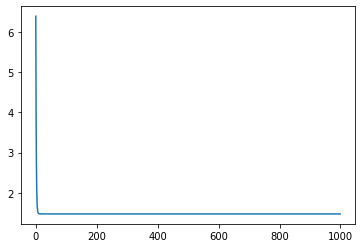

In [14]:
T = 1000  # number of steps
alpha = 0.006  # learning parameter
theta0 = 3.0  # initial value
theta1 = 1.0  # initial value
N = len(x)
Jtable = []

for t in range(T):
    J = 0
    dJ0 = 0
    dJ1 = 0
    for i in range(N):
        h_minus_y = theta0 + theta1 * x[i] - y[i]
        J += h_minus_y**2 / (2 * N)
        dJ0 += h_minus_y /N
        dJ1 += h_minus_y * x[i] /N
    theta0 -= alpha * dJ0
    theta1 -= alpha * dJ1
    Jtable.append(J)
    print('t', t, '  J', J,  'theta0, theta1', theta0, theta1)
plt.plot(Jtable)
plt.show()

### Plotting the result

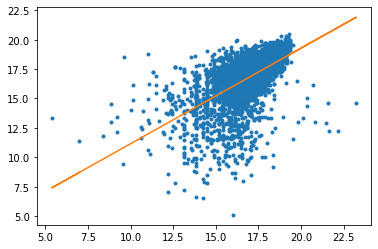

In [16]:
plt.plot(x,y,'.')
plt.plot(x,theta0 + theta1 * x)
plt.show()

### Question 3
The gradient descent algorithm can be improved.
- Implement the same gradient descent algorithm but with rescaled data
- Implement the algorithm with stochastic gradient descent (at each time step a data is randomly picked and the parameters are updated with this single data, N=1)
- Implement the algorithm with mini-batches (at each time step n<N data are randomly picked and the parameters are updated with this data)

In [25]:
N

3756

t 999   J 0.3283044612955142 theta0, theta1 0.0007016028010054672 0.548018497431422


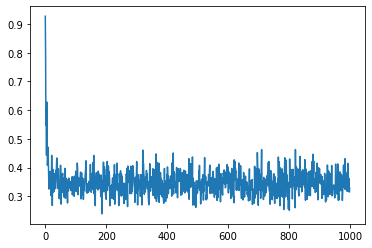

In [31]:
x_rescaled = (x - np.mean(x)) / np.std(x)
y_rescaled = (y - np.mean(y)) / np.std(y)

T = 1000  # number of steps
alpha = 0.1  # learning parameter
theta0 = 1  # initial value
theta1 = .6  # initial value
N = len(x)
n = 500 
Jtable = []
for t in range(T):
    J = 0
    dJ0 = 0
    dJ1 = 0
    indices = np.arange(N)
    np.random.shuffle(indices)
    indices = indices[:n]
    for j in range(n):
        i = indices[j]
        h_minus_y = theta0 + theta1 * x_rescaled[i] - y_rescaled[i]
        J += h_minus_y**2 / (2 * n)
        dJ0 += h_minus_y /n
        dJ1 += h_minus_y * x_rescaled[i] /n
    theta0 -= alpha * dJ0
    theta1 -= alpha * dJ1
    Jtable.append(J)
print('t', t, '  J', J,  'theta0, theta1', theta0, theta1)
plt.plot(Jtable)
plt.show()

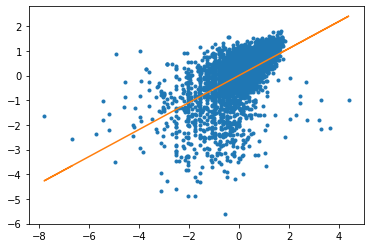

0.7727375038273349


In [32]:
plt.plot(x_rescaled,y_rescaled,'.')
plt.plot(x_rescaled,theta0 + theta1 * x_rescaled)
plt.show()
print(theta1 * np.std(y) / np.std(x))

## Regression by direct method
The parameters $\theta_0$ and $\theta_1$ can also be obtained by the direct method

$\theta_1 = {\langle (x - \langle x \rangle) (y - \langle y \rangle)}\rangle \,/\, {\langle(x - \langle x \rangle)^2\rangle}$

$\theta_0 = \langle y \rangle - \theta_1 \langle x \rangle$

### Question 4
Complete the code below to calculate $\theta_0$ and $\theta_1$ directly.

In [14]:
xm = np.mean(x)
ym = np.mean(y)

t1 = np.mean((x - xm) * (y - ym)) / np.mean((x - xm)**2)
t0 = ym - t1 * xm

print(t0,t1)

3.479870650561214 0.78570145929595


### Question 5
Compare the different methods graphically and discuss why the results may be different. 